In [22]:
#librerias
import tweepy
import pandas as pd
import numpy as np
from textblob import TextBlob 
import matplotlib.pyplot as plt 
%matplotlib inline

In [85]:
#traductor
import requests
def conversion( text):
    parametros = {'sl': "es", 'tl': "en", 'q': text}
    cabeceras = {"Charset":"UTF-8","User-Agent":"AndroidTranslate/5.3.0.RC02.130475354-53000263 5.1 phone TRANSLATE_OPM5_TEST_1"}
    url = "https://translate.google.com/translate_a/single?client=at&dt=t&dt=ld&dt=qca&dt=rm&dt=bd&dj=1&hl=es-ES&ie=UTF-8&oe=UTF-8&inputm=2&otf=2&iid=1dd3b944-fa62-4b55-b330-74909a99969e"
    response = requests.post(url, data=parametros, headers=cabeceras)
    if response.status_code == 200:
        for x in response.json()['sentences']:
            return x['trans']
    else:
        return "Ocurrió un error"

def traductor (texto):
    new = ""
    i = 0
    for text in texto.split(' ' or ','):
        temp = conversion(text)
        if (i == 0):
            new = new + temp + " "
        else:
            new = new + " " + temp
    return new



In [86]:
consumer_key = 'pI00QpcfKC6lBM1RfE9JtkhaM'
consumer_secret = 'F2BDX0mnCTBNzzm4pwucxmC2eMEV7m4eA2Lcqtc1vHhYn8i7l2'
access_key = '1137498726-0r4ED0vzrsgtcvsIfXfhnvxULOmzViLYDddJyqz'
access_secret = 'XhHklwC84jgXuPDtE6bB1O9cUVxKEYK0mu8A7s82yDcuG'

In [107]:
# Function to extract tweets 
lista1 = []
lista2 = []
def extraccion_datos(username,cant_t): 
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret) 
    auth.set_access_token(access_key, access_secret) 
    api = tweepy.API(auth) 
    number_of_tweets = cant_t
    
    tweets = tweepy.Cursor(api.user_timeline,screen_name=username,tweet_mode="extended")
    tmp=[] 
    
    for j in tweets.items(cant_t):
        pos_count = 0
        pos_correct = 0
        neg_correct=0
        neg_count=0
        new_t = traductor(j.full_text)
        new_t = TextBlob(new_t)
        #polaridad-analisis
        if new_t.sentiment.polarity > 0:
            pos_correct += 1
        else: 
            neg_correct += 1
        pos_count +=1
        neg_count +=1
        
        print ("->tweets = ", new_t)
        # Añadir tweets a la matriz vacía tmp
        tmp.append(j) 
        print("Precisión positiva ",(pos_correct/pos_count)*100.0)
        lista1.append((pos_correct/pos_count)*100.0)
        print("Precisión negativa ",(neg_correct/neg_count)*100.0)
        lista2.append((neg_correct/neg_count)*100.0)
    return (lista1,lista2)

In [108]:
#gtraficar los datos datos del sentimiento
def graficar(lista1,lista2):
    lista1 = lista1[::-1]
    plt.plot(lista1)
    plt.title("SENTIMIENTO POSITIVO")
    plt.ylabel("positivo")
    plt.xlabel("instancias de emociones")
    plt.show()
    
    lista2 = lista2[::-1]
    plt.plot(lista2)
    plt.title("SENTIMIENTO NEGATIVO")
    plt.ylabel("negativo")
    plt.xlabel("instancias de emociones")
    plt.show()
   

->tweets =  RT @hurgamemoriaPE: He unbalance patrimonial from @LUCIANA_LEON_R was so evident that # AhorrocomoLucianaLeón it was trend make 5 years. 
Precisión positiva  100.0
Precisión negativa  0.0
->tweets =  RT @ Dandelion8mf: Yesterday I found is wallet in a Cab. You belongs to Uber Orlando Rail Bouquets Help me for find him Y give him their d ... 
Precisión positiva  0.0
Precisión negativa  100.0
->tweets =  RT @CesarRomeroC: From agreement with the aspirants to collaborator effective, the congressman Luciana Lion received Payments monthly from fifteen one thousand to twenty me… 
Precisión positiva  100.0
Precisión negativa  0.0


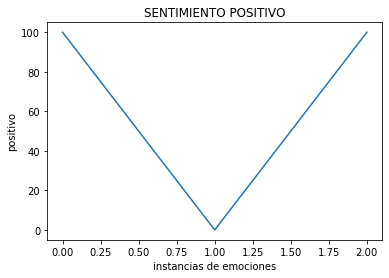

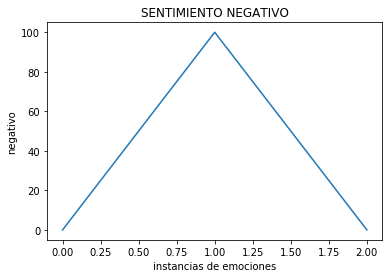

In [109]:
cant_t = 3
extraccion_datos("rmapalacios",cant_t) 
graficar(lista1,lista2)

->tweets =  Eu to flirting Ele that no want attend 
Precisión positiva  0.0
Precisión negativa  100.0
->tweets =  RT @SCInternational: GOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOOO D ... 
Precisión positiva  0.0
Precisión negativa  100.0
->tweets =  Here, he boss we are U.S!!! https://t.co/5SFppsEneA 
Precisión positiva  0.0
Precisión negativa  100.0


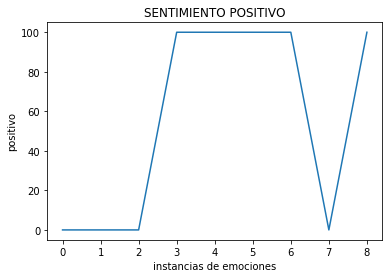

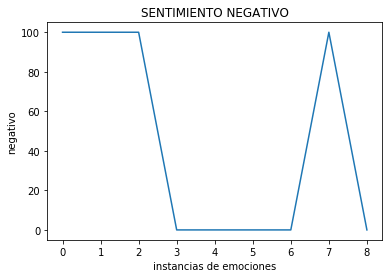

In [111]:
cant_t = 3
extraccion_datos("PaoIoGuerreroOk",cant_t) 
graficar(lista1,lista2)

->tweets =  How today, nineteen ninety six, be reported that #Bolivia was he country from higher risk for the investment. Cheated to the town Bolivian Y you they promised that the privatization bring investments, but alone brought poverty. Now our economy is sovereign Y we work with partners, already no with patterns. https://t.co/aT5jYqLt3u 
Precisión positiva  100.0
Precisión negativa  0.0
->tweets =  In he day from its birthday, we send a hug to Wake from Carlotto, copy activist by the rights humans since the Association Grandmothers from Square from May. Sister Wake, the villages from the #PatriaGrande tea will thank eternally by you copy fight. Many Congratulations! https://t.co/bVb6DasbAF 
Precisión positiva  100.0
Precisión negativa  0.0
->tweets =  How today, nineteen ninety six, Sanchez from Lozada clarified that the fight against the poverty no I was in the diary from the Summit from Developing Sustainable in Santa cross for comply the order from USA that be denied to try tha

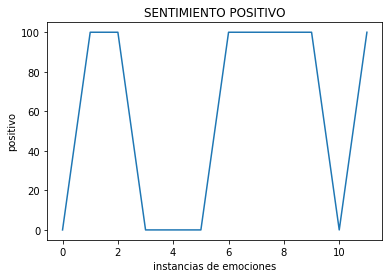

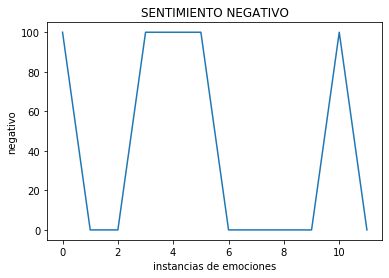

In [112]:
cant_t = 3
extraccion_datos("evoespueblo",cant_t) 
graficar(lista1,lista2)

->tweets =  Welcome to Paracas President @sebastianpinera, to the III Cabinet # Binational Peru Peru! Today we have a working day from job for consolidate the agreements, secure the relationship bilateral Y build powerful ties for he future in benefit from our citizens https://t.co/Jl366aEprT 
Precisión positiva  100.0
Precisión negativa  0.0
->tweets =  In he #Journalist Day, express me recognition to the women Y mens from press, whose job is fundamental for strengthen the freedom from press Y expression, pillars fundamental from our democracy. Happy day! 
Precisión positiva  100.0
Precisión negativa  0.0
->tweets =  We arrived to the border between Peru Y Colombia for reaffirm our commitment from preserve the Amazon, source from lifetime Y lung of the planet, in the # CumbrePorLaAmazonía. Before, in Santa pink from Yavarí, we dialogue with their main defenders: the citizens from is location. https://t.co/OS9kKzA8Qg 
Precisión positiva  100.0
Precisión negativa  0.0
->tweets =  Today 

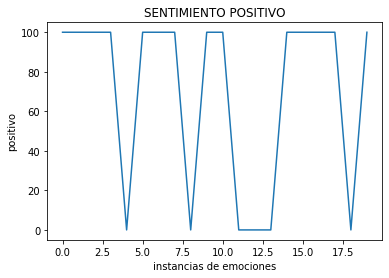

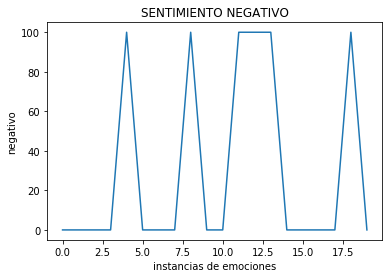

In [113]:
extraccion_datos("MartinVizcarraC",8) 
graficar(lista1,lista2)

tweets =  RT @hurgamemoriaPE: He unbalance patrimonial from @LUCIANA_LEON_R was so evident that # AhorrocomoLucianaLeón it was trend make 5 years. 
Precisión positiva  100.0
Precisión negativa  0.0
tweets =  RT @ Dandelion8mf: Yesterday I found is wallet in a Cab. You belongs to Uber Orlando Rail Bouquets Help me for find him Y give him their d ... 
Precisión positiva  0.0
Precisión negativa  100.0


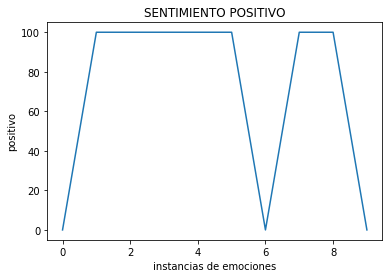

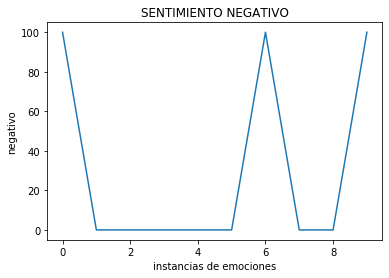

In [93]:
extraccion_datos("rmapalacios",9) 
graficar(lista1,lista2)